## Observations and Insights 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, on="Mouse ID", how="inner")
# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [86]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_id = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = combined_data.loc[combined_data['Mouse ID'] =='g989',:]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [89]:
unique_timepointt =combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index, inplace=False)
unique_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_ID = unique_timepoint.drop_duplicates(['Mouse ID'])
unique_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [91]:
# Checking the number of mice in the clean DataFrame.
len(unique_ID["Mouse ID"])

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_name = unique_timepoint.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_name["Tumor Volume (mm3)"].mean()
median = drug_name["Tumor Volume (mm3)"].median()
variance = drug_name["Tumor Volume (mm3)"].var()
standard_deviation = drug_name["Tumor Volume (mm3)"].std()
SEM = drug_name["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

df = pd.concat([mean,median,variance,standard_deviation,SEM], axis=1)
symbols = ["Mean","Median","Variance","Standard Deviation","SEM"]
df.columns = symbols
df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggMethod = unique_timepoint.groupby('Drug Regimen').agg({'Mouse ID': ['count'],'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_aggMethod

Mouse ID Tumor Volume (mm3)                                  \
                count               mean     median        var       std   
Drug Regimen                                                               
Capomulin         230          40.675741  41.557809  24.947764  4.994774   
Ceftamin          178          52.591172  51.776157  39.290177  6.268188   
Infubinol         178          52.884795  51.820584  43.128684  6.567243   
Ketapril          188          55.235638  53.698743  68.553577  8.279709   
Naftisol          186          54.331565  52.509285  66.173479  8.134708   
Placebo           181          54.033581  52.288934  61.168083  7.821003   
Propriva          148          52.320930  50.446266  43.852013  6.622085   
Ramicane          228          40.216745  40.673236  23.486704  4.846308   
Stelasyn          181          54.233149  52.431737  59.450562  7.710419   
Zoniferol         182          53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

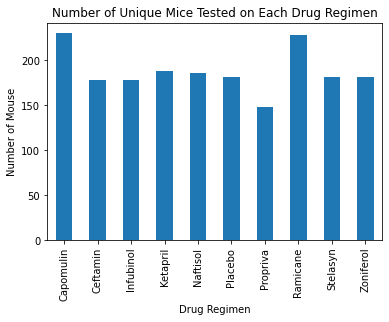

<Figure size 432x288 with 0 Axes>

In [94]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_mouse = drug_name['Mouse ID'].count()
drug_chart = drug_mouse.plot(kind="bar", title="Number of Unique Mice Tested on Each Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mouse")

plt.show()
plt.tight_layout()

In [95]:
# get the list of drug names
names = combined_data.iloc[:,1].unique()
namelist = names.tolist()
namelist

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

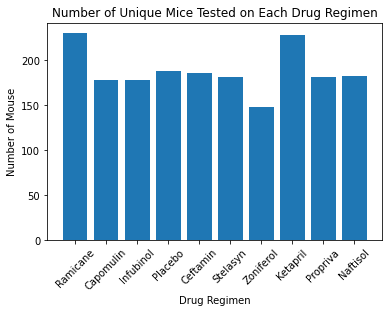

In [96]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_mouse_count = []
for y in drug_mouse:
    drug_mouse_count.append(y)

plt.bar(namelist, drug_mouse_count, align="center")
plt.title("Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse')
plt.xticks(rotation = 45)
plt.show()


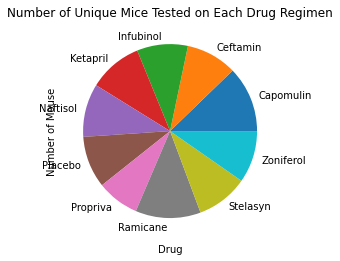

<Figure size 432x288 with 0 Axes>

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drug_chart = drug_mouse.plot(kind="pie", title="Number of Unique Mice Tested on Each Drug Regimen")
drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Number of Mouse")

plt.show()
plt.tight_layout()


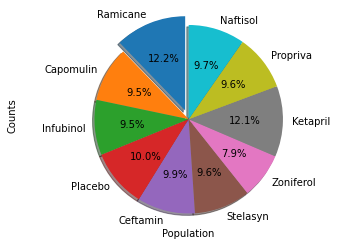

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0, 0, 0,0,0,0,0,0,0)
plt.pie(drug_mouse_count,explode=explode, labels=namelist,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.xlabel('Population')
plt.ylabel('Counts')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_unique = unique_timepoint.groupby("Mouse ID")
max_timepoint = mouse_unique["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_volume = max_timepoint.merge(unique_timepoint, on = ["Mouse ID","Timepoint"])
last_volume
## Another thought on how to get thr four grugs dataframe
    #last_1= last_volume[(last_volume['Drug Regimen']=='Capomulin')]
    #last_2= last_volume[(last_volume['Drug Regimen']=="Ramicane" )]
    #last_3= last_volume[(last_volume['Drug Regimen']=="Infubinol")]
    #last_4= last_volume[(last_volume['Drug Regimen']=="Ceftamin")]
    #final_volume = last_1.append([last_2,last_3,last_4])
    #final_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [100]:
# Put treatments into a list for for loop (and later for plot labels)

treatmentlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for t in treatmentlist:
    print(f'Result analysis after {t} treatment.')
    treatments = pd.DataFrame(last_volume.loc[last_volume["Drug Regimen"] == t,:]).reset_index()
    tumor_vol_data.append(treatments["Tumor Volume (mm3)"])
    #print(treatments)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatments["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    
    first_quartile = quartiles[0.25]
    print(f'The first quartile is: {first_quartile}')
    
    second_quartile = quartiles[0.5]
    print(f'The second quartile is: {second_quartile}')
    
    third_quartile = quartiles[0.75]
    print(f'The third quartile is: {third_quartile}')
    
    IQR = third_quartile - first_quartile
    print(f'The IQR is: {IQR}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5*IQR)
    upper_bound = third_quartile + (1.5*IQR)
    print(f'If the value lower than {lower_bound} or higher than {upper_bound}, it is a outlier.' )
    print('-----------------------------')
    

Result analysis after Capomulin treatment.
The first quartile is: 32.37735684
The second quartile is: 38.125164399999996
The third quartile is: 40.1592203
The IQR is: 7.781863460000004
If the value lower than 20.70456164999999 or higher than 51.83201549, it is a outlier.
-----------------------------
Result analysis after Ramicane treatment.
The first quartile is: 31.56046955
The second quartile is: 36.56165229
The third quartile is: 40.65900627
The IQR is: 9.098536719999998
If the value lower than 17.912664470000003 or higher than 54.30681135, it is a outlier.
-----------------------------
Result analysis after Infubinol treatment.
The first quartile is: 54.04860769
The second quartile is: 60.16518046
The third quartile is: 65.52574285
The IQR is: 11.477135160000003
If the value lower than 36.83290494999999 or higher than 82.74144559000001, it is a outlier.
-----------------------------
Result analysis after Ceftamin treatment.
The first quartile is: 48.72207785
The second quartile is

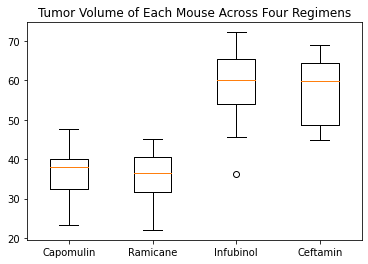

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse Across Four Regimens')
ax1.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], treatmentlist)
plt.show()

## Line and Scatter Plots

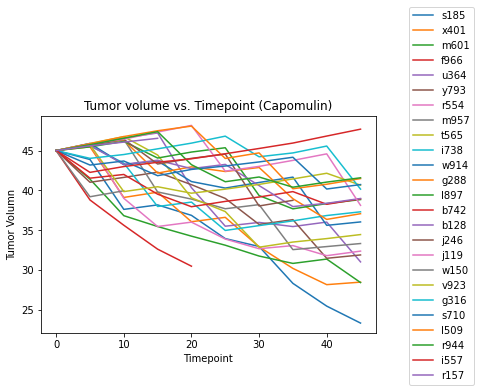

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = pd.DataFrame(combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]).reset_index()

# generate the list of mouse id
mouse_id = Capomulin_df.iloc[:,1].unique()
mouselist = mouse_id.tolist()
mouselist

# Plot
for mouse in mouselist:
    Capomulin_onemouse_df = pd.DataFrame(Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse,:]).reset_index()
    time = Capomulin_onemouse_df["Timepoint"].to_list()
    volume = Capomulin_onemouse_df["Tumor Volume (mm3)"].to_list()
    Capomulin_vs_time,= plt.plot(time, volume, label= mouse)

# Cleaning the format    
plt.title('Tumor volume vs. Timepoint (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volumn') 
plt.legend(bbox_to_anchor=(1.1, 1.5), loc='upper left', borderaxespad=0.)


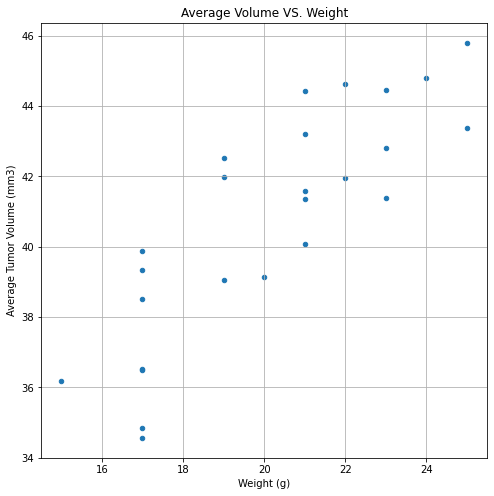

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
group_by_mouse = Capomulin_df.groupby(["Mouse ID"])
weight_vs_volume_df = group_by_mouse[["Weight (g)", "Tumor Volume (mm3)"]]
mean_df = weight_vs_volume_df.mean()
mean_df = mean_df.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
mean_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Average Volume VS. Weight")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.8419363424694717


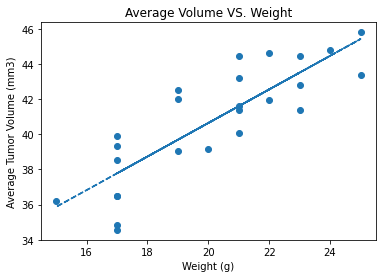

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cc = mean_df["Weight (g)"].corr(mean_df["Average Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {cc}")

weight = mean_df.iloc[:,0]
Avg_volume = mean_df.iloc[:,1]

ATV_slope, ATV_int, ATV_r, ATV_p, ATV_std_err = st.linregress(weight,Avg_volume)
ATV_fit = ATV_slope * weight + ATV_int


plt.scatter(weight,Avg_volume)
plt.plot(weight,ATV_fit,"--")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Volume VS. Weight")
plt.show()